In [1]:
import pandas as pd
import numpy as np
from empath import Empath 
lexicon = Empath()
# PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
# Loading the data of character metadata

df_characters = pd.read_csv('Data/character.metadata.tsv', sep='\t')
df_characters.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender',
                        'Actor height (in meters)', 'Actor ethnicity (Freebase ID)', 'Actor name', 'Actor age at movie release',
                        'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID']

In [3]:
# Loading the data of movie metadata

df_movie = pd.read_csv('Data/movie.metadata.tsv', sep='\t')
df_movie.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime',
                    'Movie languages (Freebase ID)', 'Movie countries (Freebase ID)', 'Movie genres (Freebase ID)']

In [4]:
df_char_movie = pd.merge(left=df_characters, right=df_movie, how='inner', on= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date'])

In [5]:
CMdf = pd.read_csv('Data/Characters_Matched_DF_Clean.csv', sep='\t',index_col = 0)
CMdf.columns = ['Wikipedia movie ID', 'Character name', 'Agent Verbs', 'Patient Verbs', 'Attributes']
CMdf.reset_index(inplace = True,drop=True)
CMdf.drop_duplicates(inplace = True)

In [6]:
CMdf = pd.merge(left= CMdf, right=df_char_movie, how='inner', on= ['Wikipedia movie ID', 'Character name'])

In [7]:
CMdf

,Wikipedia movie ID,Character name,Agent Verbs,Patient Verbs,Attributes,Freebase movie ID,Movie release date,Actor date of birth,Actor gender,Actor height (in meters),...,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie name,Movie box office revenue,Movie runtime,Movie languages (Freebase ID),Movie countries (Freebase ID),Movie genres (Freebase ID)
0,20663735,M.K. Menon,"['refuses', 'regrets', 'suffers']","['accused', 'judged']",judge jail corruption funeral,/m/051zjwb,2000,1935-12-10,M,NaN,...,64.0,/m/059t6pp,/m/0h73lnb,/m/02hkvw,Narasimham,NaN,175.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
1,20663735,Marancheri Induchoodan,",['loses', 'passes', 'thwarts', 'follow', 'fal...",",['framed']","son,dead years state confrontations friend court",/m/051zjwb,2000,1960-05-21,M,1.720,...,39.0,/m/059t6p_,/m/0h8gtfl,/m/02fbpz,Narasimham,NaN,175.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
2,595909,Michael Chamberlain,"['holiday', 'uses', 'disintegrate'],['overturn...","['found'],","pastor day faith,convictions",/m/02tqm5,1988-11-03,1947-09-14,M,1.822,...,41.0,/m/02tbjj2,/m/0h2qv0j,/m/01ckhj,A Cry in the Dark,6908797.0,121.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,595909,Lindy Chamberlain,"['returns', 'saw', 'seems', 'insisted']","['charged', 'found']",wife,/m/02tqm5,1988-11-03,1949-06-22,F,1.680,...,39.0,/m/02tb1h6,/m/05z0x_h,/m/0h0wc,A Cry in the Dark,6908797.0,121.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
4,5272176,Vaughn Stevens,"['handed'],",",","home,house",/m/0dbxtv,2006,1947-04-18,M,1.803,...,58.0,/m/02vbgnd,/m/0h1p30b,/m/016ks_,End Game,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16098,26261438,Midget Hup,NaN,NaN,sidekick,/m/0b76dxj,1989,NaN,NaN,NaN,...,NaN,/m/0gm3642,/m/0gm360m,/m/0gm35rf,Outlaw of Gor,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/0hj3n2k"": ..."
16099,26261438,Marlenus,['announces'],NaN,death killer,/m/0b76dxj,1989,1942-06-26,M,NaN,...,46.0,/m/0gm35v4,/m/0gm35rb,/m/0gyvyw,Outlaw of Gor,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/0hj3n2k"": ..."
16100,26261438,Marlenus,['announces'],NaN,death killer,/m/0b76dxj,1989,1942-06-26,M,NaN,...,46.0,/m/0gm363z,/m/0gm360d,/m/0gyvyw,Outlaw of Gor,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/0hj3n2k"": ..."
16101,26261438,Queen Lara,"['desires', 'hire', 'betrays', 'tries', 'break...",NaN,alliance attempt killer,/m/0b76dxj,1989,NaN,NaN,NaN,...,NaN,/m/0gm35s0,/m/0gm35p2,/m/0gcjntw,Outlaw of Gor,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/0hj3n2k"": ..."


## Columns kept:
In this section, we extract the following columns for each character:
We keep only features such as for the preliminary sentiment analysis: 
- `Wikipedia movie ID`: ID of the movie from wikidata
- `Character name`: character name associated with verbs and attributes
- `Actor gender`
- `Agent Verbs`
- `Patient Verbs`
- `Attributes`

However, for later analysis, we would want to add other interesting features such as:
- `Movie release date`: the release date of the movie the character is from
- `nbr_words`: median of number of words in the plot summary corresponding to the movie ID
- `nbr_characters`: median of number of characters present in the movie (that we have in the final data!)

In [8]:
CMdf_c = CMdf[['Wikipedia movie ID','Character name','Actor gender','Agent Verbs','Patient Verbs','Attributes']]

In [9]:
#our lexicon.analyze requires a string of words with a space between them. 
# to transform current AV,PV, Attributes into required format: 

CMdf_c['Agent Verbs'] = CMdf_c['Agent Verbs'].str.replace(',' ,' ')
CMdf_c['Agent Verbs'] = CMdf_c['Agent Verbs'].str.replace('[' ,'')
CMdf_c['Agent Verbs'] = CMdf_c['Agent Verbs'].str.replace(']' ,'')
CMdf_c['Agent Verbs'] = CMdf_c['Agent Verbs'].str.replace("'" ,'')
CMdf_c['Patient Verbs'] = CMdf_c['Patient Verbs'].str.replace(',' ,' ')
CMdf_c['Patient Verbs'] = CMdf_c['Patient Verbs'].str.replace('[' ,'')
CMdf_c['Patient Verbs'] = CMdf_c['Patient Verbs'].str.replace(']' ,'')
CMdf_c['Patient Verbs'] = CMdf_c['Patient Verbs'].str.replace("'" ,'')
CMdf_c['Attributes'] = CMdf_c['Attributes'].str.replace(',' ,' ')
CMdf_c['Attributes'] = CMdf_c['Attributes'].str.replace('[' ,'')
CMdf_c['Attributes'] = CMdf_c['Attributes'].str.replace(']' ,'')
CMdf_c['Attributes'] = CMdf_c['Attributes'].str.replace("'" ,'')

C:\Users\nerea\AppData\Local\Temp\ipykernel_24276\1201945030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CMdf_c['Agent Verbs'] = CMdf_c['Agent Verbs'].str.replace(',' ,' ')
C:\Users\nerea\AppData\Local\Temp\ipykernel_24276\1201945030.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  CMdf_c['Agent Verbs'] = CMdf_c['Agent Verbs'].str.replace('[' ,'')
C:\Users\nerea\AppData\Local\Temp\ipykernel_24276\1201945030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [10]:
CMdf_c

,Wikipedia movie ID,Character name,Actor gender,Agent Verbs,Patient Verbs,Attributes
0,20663735,M.K. Menon,M,refuses regrets suffers,accused judged,judge jail corruption funeral
1,20663735,Marancheri Induchoodan,M,loses passes thwarts follow falls thrash...,framed,son dead years state confrontations friend court
2,595909,Michael Chamberlain,M,holiday uses disintegrate overturned,found,pastor day faith convictions
3,595909,Lindy Chamberlain,F,returns saw seems insisted,charged found,wife
4,5272176,Vaughn Stevens,M,handed,,home house
...,...,...,...,...,...,...
16098,26261438,Midget Hup,NaN,NaN,NaN,sidekick
16099,26261438,Marlenus,M,announces,NaN,death killer
16100,26261438,Marlenus,M,announces,NaN,death killer
16101,26261438,Queen Lara,NaN,desires hire betrays tries breaks rule e...,NaN,alliance attempt killer


_________________________________________________________________________________________________

# Lexical Analysis

Quick test on lexicon.analyze : 

In [11]:
CMdf_c['Agent Verbs'][1]

' loses  passes  thwarts  follow  falls  thrashes  decides  has  returns  returns  interrupts  accepts'

In [12]:
y = lexicon.analyze(CMdf_c['Agent Verbs'][1],normalize=True) #y is a dicitonary

for key, value in y.items():
    if value>0:
        print(key, "|", value)

social_media | 0.08333333333333333
order | 0.08333333333333333
fight | 0.08333333333333333
competing | 0.08333333333333333


________________________________________________________________________________________________________

## attempting to incorporate the pope groups method:

## Feature extraction:
-  `scores` returned by the `analyze` function of the `Empath library` for different lexical categories. We choose these categories to cover a wide range of lexical fields for the purpose of our data analysis and obtain a score for each one of them. The whole list of categories of this library can be found following this link: https://github.com/Ejhfast/empath-client/blob/master/empath/data/categories.tsv.
- `Richness of the vocabulary`, that we compute by counting the median number of different words in the attributes, agent and patient verbs for women and men.
Other informations:
For later:
- `Top10Words`: presence or absence of verbs or attributes in the top 10 words occurring the most (make categories of them ? such as top10 violence, top10 sex etc)

These features could be added to the columns of the previous dataframe for each character but this would render the analysis too difficult for more than 15 000 characters !! For this reason, we first group the data in 2 groups: men and women, for a preliminary sentiment analysis but we want to extend this to common archetypes by gender later.

In [19]:
# grouping of the data:
women = CMdf_c.loc[CMdf_c['Actor gender'] == 'F']
men = CMdf_c.loc[CMdf_c['Actor gender'] == 'M']

In [20]:
women.dtypes

Wikipedia movie ID     int64
Character name        object
Actor gender          object
Agent Verbs           object
Patient Verbs         object
Attributes            object
dtype: object

In [21]:
women.fillna('', inplace=True)
men.fillna('', inplace=True)

C:\Users\nerea\AppData\Local\Temp\ipykernel_24276\271749134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women.fillna('', inplace=True)
C:\Users\nerea\AppData\Local\Temp\ipykernel_24276\271749134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men.fillna('', inplace=True)


In [22]:
for elem in ['Agent Verbs', 'Patient Verbs', 'Attributes']:

    women[elem] = women[elem].astype("string")
    men[elem] = men[elem].astype("string")

C:\Users\nerea\AppData\Local\Temp\ipykernel_24276\4138936344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women[elem] = women[elem].astype("string")
C:\Users\nerea\AppData\Local\Temp\ipykernel_24276\4138936344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men[elem] = men[elem].astype("string")


In [23]:
women.dtypes

Wikipedia movie ID     int64
Character name        object
Actor gender          object
Agent Verbs           string
Patient Verbs         string
Attributes            string
dtype: object

In [24]:
def voc(x):
    if len(x)==0:
        res = 0
    else:
        res = len(x.split())
    return res

In [25]:
#women['Agent Verbs'][3]

In [26]:
#len(women['Agent Verbs'][3].split())
#len(women['Agent Verbs'][3].strip(" "))

In [27]:
# Richness of the vocabulary for women:
women_voc_av = women['Agent Verbs'].apply(lambda x: pd.Series({'sum': voc(x)}))
women_voc_av = women_voc_av['sum'].median()
women_voc_pv = women['Patient Verbs'].apply(lambda x: pd.Series({'sum': voc(x)}))
women_voc_pv = women_voc_pv['sum'].median()
women_voc_att = women['Attributes'].apply(lambda x: pd.Series({'sum': voc(x)}))
women_voc_att = women_voc_att['sum'].median()

In [28]:
# Richness of the vocabulary for men:
men_voc_av = men['Agent Verbs'].apply(lambda x: pd.Series({'sum': voc(x)}))
men_voc_av = men_voc_av['sum'].median()
men_voc_pv = men['Patient Verbs'].apply(lambda x: pd.Series({'sum': voc(x)}))
men_voc_pv = men_voc_pv['sum'].median()
men_voc_att = men['Attributes'].apply(lambda x: pd.Series({'sum': voc(x)}))
men_voc_att = men_voc_att['sum'].median()

In [29]:
print('The cleaned and processed lexical information contains {} male characters and {} female characters'.format(len(men),len(women)))

The cleaned and processed lexical information contains 9927 male characters and 5871 female characters


In [30]:
#Removing categories:
#lexicon.delete_category()

In [31]:
categories = ['help','money','wedding','domestic_work','hate','cheerfulness','aggression','occupation','envy','anticipation','family','crime','attractive','masculine','prison'
,'pride','dispute','nervousness','weakness','government','horror','swearing_terms','suffering','wealthy','royalty','magic','school','beach','banking','social_media'
,'exercise','night','kill','blue_collar_job','art','ridicule','play','computer','optimism','stealing','home','sexual','fear','irritability','superhero'
,'business','driving','childish','cooking','exasperation','religion','surprise','reading','worship','leader','independence','movement','body','zest','confusion','sports','death','healing','legend','heroic','celebration'
,'violence','dominant_hierarchical','military','neglect','exotic','love','communication','hearing','order','sympathy','anonymity','trust','ancient','deception'
,'fight','dominant_personality','politeness','farming','meeting','war','speaking','listen','shopping','disgust','tool','gain','injury','rage','science','work','appearance','valuable','warmth','youth','sadness','fun','emotional','joy','affection','fashion','ugliness'
'lust','shame','torment','economics','anger','politics','strength','breaking','shape_and_size','power','white_collar_job','terrorism','party','disappointment','poor','pain','beauty','timidity','philosophy','negotiate','negative_emotion','cleaning','competing','law','friends','achievement','alcohol'
,'feminine','weapon','children','monster','giving','contentment','positive_emotion','writing','rural']

In [192]:
women_lex_av = pd.DataFrame([lexicon.analyze(women['Agent Verbs'].str.cat(sep = ' '), categories = categories)])
women_lex_pv = pd.DataFrame([lexicon.analyze(women['Patient Verbs'].str.cat(sep = ' '), categories = categories)])
women_lex_att = pd.DataFrame([lexicon.analyze(women['Attributes'].str.cat(sep = ' '), categories = categories)])

In [191]:
men_lex_av = pd.DataFrame([lexicon.analyze(men['Agent Verbs'].str.cat(sep = ' '), categories = categories)])
men_lex_pv = pd.DataFrame([lexicon.analyze(men['Patient Verbs'].str.cat(sep = ' '), categories = categories)])
men_lex_att = pd.DataFrame([lexicon.analyze(men['Attributes'].str.cat(sep = ' '), categories = categories)])

In [231]:
gendered_lex = pd.concat([ women_lex_av, women_lex_pv, women_lex_att, men_lex_av, men_lex_pv, men_lex_att], axis = 0,ignore_index=True)
gendered_lex['Total words'] = gendered_lex.sum(axis=1)

for col in gendered_lex.columns:
    gendered_lex[col] = gendered_lex[col]/gendered_lex['Total words']

gendered_lex = gendered_lex.drop(['Total words'], axis=1)
gendered_lex

,help,money,wedding,domestic_work,hate,cheerfulness,aggression,occupation,envy,anticipation,...,alcohol,feminine,weapon,children,monster,giving,contentment,positive_emotion,writing,rural
0,0.010036,0.004006,0.020030,0.003374,0.008476,0.003205,0.010078,0.008687,0.001349,0.002108,...,0.002699,0.012988,0.004639,0.038880,0.002825,0.016699,0.001518,0.024079,0.002572,0.001687
1,0.000870,0.005800,0.048724,0.000000,0.004930,0.003190,0.004640,0.000000,0.000290,0.000290,...,0.021172,0.002320,0.024072,0.036253,0.000000,0.056265,0.000000,0.004350,0.001450,0.000000
2,0.015479,0.002054,0.050483,0.016782,0.002820,0.002192,0.003280,0.013027,0.002084,0.001057,...,0.002146,0.013441,0.001257,0.092307,0.001165,0.002559,0.001287,0.030222,0.003862,0.001594
3,0.009883,0.004575,0.022292,0.003992,0.011178,0.003561,0.015688,0.011739,0.000798,0.001467,...,0.002676,0.002266,0.011955,0.025615,0.002546,0.017048,0.001489,0.019983,0.004251,0.001511
4,0.000000,0.005639,0.036727,0.000305,0.003505,0.001676,0.004572,0.001219,0.000152,0.000305,...,0.029869,0.002591,0.030479,0.030326,0.000305,0.040841,0.000000,0.004877,0.002895,0.000000
5,0.019385,0.004475,0.042116,0.015167,0.004663,0.002881,0.006415,0.015771,0.002416,0.000921,...,0.001931,0.001663,0.005930,0.066976,0.002574,0.002782,0.000762,0.029166,0.003198,0.001594


In [232]:
medians = pd.Series(data=[women_voc_av, women_voc_pv, women_voc_att, men_voc_av, men_voc_pv, men_voc_att])
gendered_lex['median num words'] = medians
gendered_lex.rename(index={0:"Agent Verb [F]", 1:"Patient Verb [F]", 2: "Attribute [F]" ,3:"Agent Verb [M]", 4:"Patient Verb [M]", 5: "Attribute [M]"}, inplace = True)
gendered_lex

C:\Users\camil\AppData\Local\Temp\ipykernel_22204\2422247104.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gendered_lex['median num words'] = medians


,help,money,wedding,domestic_work,hate,cheerfulness,aggression,occupation,envy,anticipation,...,feminine,weapon,children,monster,giving,contentment,positive_emotion,writing,rural,median num words
Agent Verb [F],0.010036,0.004006,0.020030,0.003374,0.008476,0.003205,0.010078,0.008687,0.001349,0.002108,...,0.012988,0.004639,0.038880,0.002825,0.016699,0.001518,0.024079,0.002572,0.001687,4.0
Patient Verb [F],0.000870,0.005800,0.048724,0.000000,0.004930,0.003190,0.004640,0.000000,0.000290,0.000290,...,0.002320,0.024072,0.036253,0.000000,0.056265,0.000000,0.004350,0.001450,0.000000,0.0
Attribute [F],0.015479,0.002054,0.050483,0.016782,0.002820,0.002192,0.003280,0.013027,0.002084,0.001057,...,0.013441,0.001257,0.092307,0.001165,0.002559,0.001287,0.030222,0.003862,0.001594,3.0
Agent Verb [M],0.009883,0.004575,0.022292,0.003992,0.011178,0.003561,0.015688,0.011739,0.000798,0.001467,...,0.002266,0.011955,0.025615,0.002546,0.017048,0.001489,0.019983,0.004251,0.001511,5.0
Patient Verb [M],0.000000,0.005639,0.036727,0.000305,0.003505,0.001676,0.004572,0.001219,0.000152,0.000305,...,0.002591,0.030479,0.030326,0.000305,0.040841,0.000000,0.004877,0.002895,0.000000,0.0
Attribute [M],0.019385,0.004475,0.042116,0.015167,0.004663,0.002881,0.006415,0.015771,0.002416,0.000921,...,0.001663,0.005930,0.066976,0.002574,0.002782,0.000762,0.029166,0.003198,0.001594,3.0


# PCA:

The 2D PCA contains 78.3127 % of the information

Component 1 contains 56.121348123725944 % of the information
Component 2 contains 22.191359006609808 % of the information
Component 3 contains 10.077876724552638 % of the information

So far, 11.609416145111606 % of the information has been lost


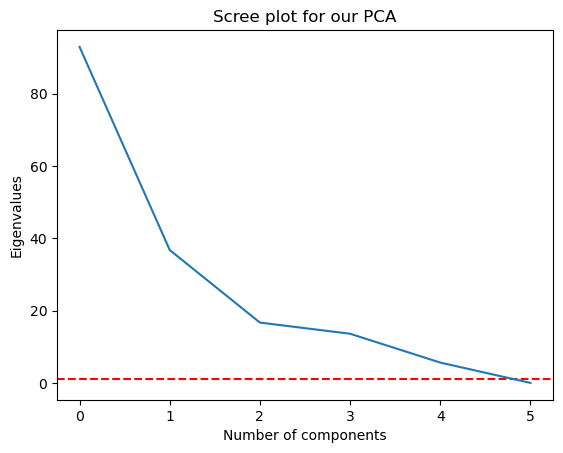

In [236]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(gendered_lex.loc[:,:'positive_emotion']), columns = gendered_lex.loc[:,:'positive_emotion'].columns).copy()

%matplotlib inline

pca_screeplot = PCA(n_components=6)
pca_screeplot.fit_transform(scaled_df)
pca = PCA().fit(scaled_df)

# Percentage variance explaines
ratio = pca_screeplot.explained_variance_ratio_
print('The 2D PCA contains',round((ratio[0]+ratio[1])*100,4),'% of the information' )
print("")
print ('Component 1 contains',ratio[0]*100,'% of the information' )
print ('Component 2 contains',ratio[1]*100,'% of the information' )
print ('Component 3 contains',ratio[2]*100,'% of the information' )
print("")
print ('So far,',(1-np.sum([ratio[0],ratio[1],ratio[2]]))*100,'% of the information has been lost' )

#Scree Plot
plt.ylabel("Eigenvalues")
plt.xlabel("Number of components")
plt.title("Scree plot for our PCA")
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.plot(pca.explained_variance_)
plt.show()

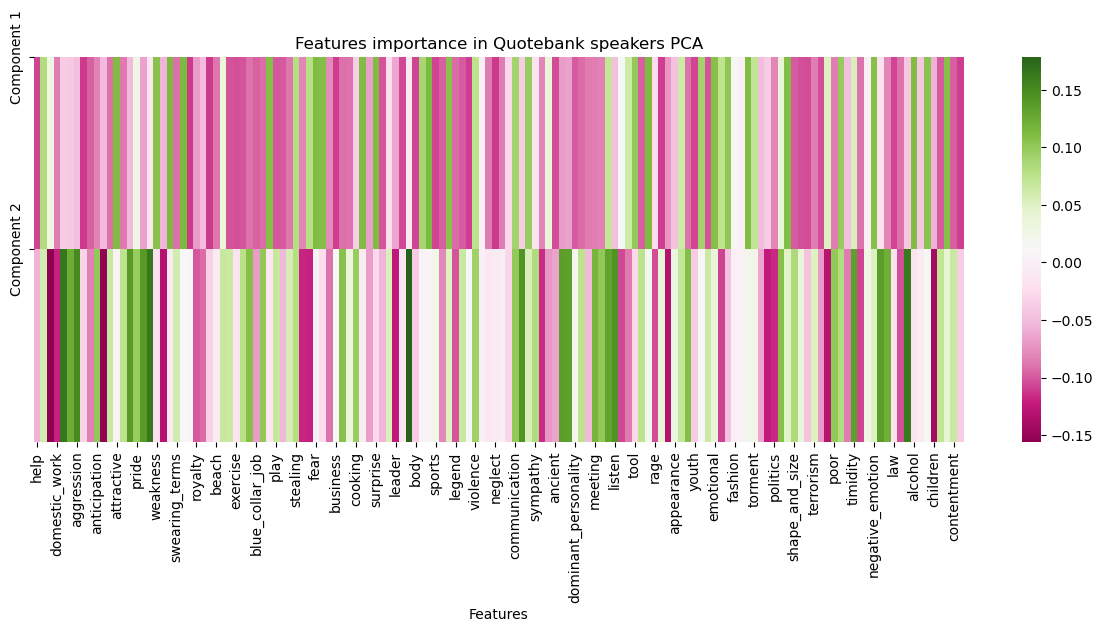

In [238]:
%matplotlib inline

plt.figure(figsize=(15,5))

pca_2d = PCA(n_components=2)
pca_2d.fit_transform(scaled_df)
pca = PCA().fit(scaled_df)

map_ = pd.DataFrame(pca_2d.components_,columns=scaled_df.columns)
sns.heatmap(map_,cmap="PiYG")
plt.title("Features importance in Quotebank speakers PCA")
plt.yticks([0,1],['Component 1','Component 2'], fontsize=10)
plt.xlabel('Features')
plt.show()

In [239]:
#2D PCA
PCA_2d = PCA(n_components=2)
PCs_2 = PCA_2d.fit_transform(scaled_df)
res_PCA_2d = pd.DataFrame(data = PCs_2, columns = ['Principal component 1', 'Principal component 2'])

#3D PCA
PCA_3d = PCA(n_components=3)
PCs_3 = PCA_3d.fit_transform(scaled_df)
res_PCA_3d = pd.DataFrame(data = PCs_3, columns = ['Principal component 1', 'Principal component 2', 'Principal component 3'])

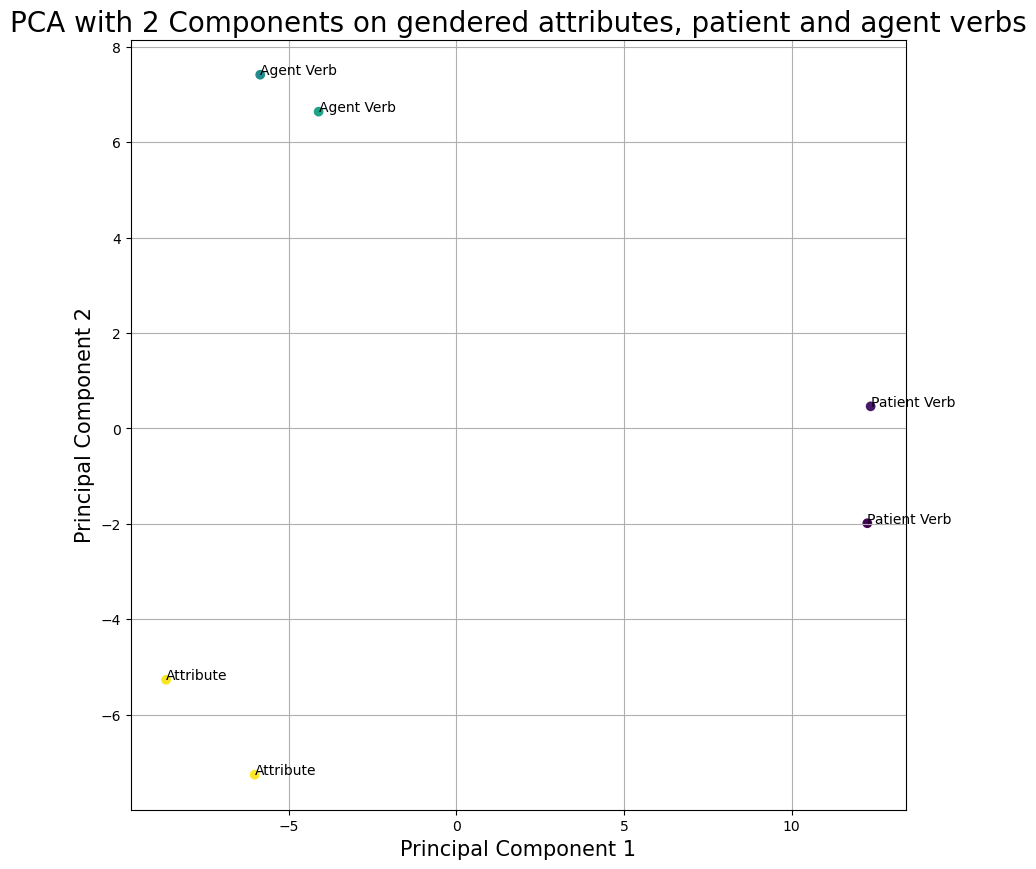

In [240]:
#Visualize results 2D PCA
%matplotlib inline

plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1',fontsize = 15)  
plt.ylabel('Principal Component 2',fontsize = 15)  
plt.title("PCA with 2 Components on gendered attributes, patient and agent verbs",fontsize=20) 

plt.scatter(res_PCA_2d.loc[:,'Principal component 1'], res_PCA_2d.loc[:,'Principal component 2'], c = gendered_lex['party'])

gendered_words = [['Agent Verb', 0],['Patient Verb',0],['Attribute',0],['Agent Verb',1],['Patient Verb',1],['Attribute',1]]

for i, speaker in enumerate(gendered_words):
    plt.annotate(speaker[0], (res_PCA_2d.loc[:,'Principal component 1'][i], res_PCA_2d.loc[:,'Principal component 2'][i]))

plt.grid()
plt.savefig("data/PCA_visualization.png")
plt.show()

In [224]:
gendered_lex[['hate','monster']]

,hate,monster
Agent Verb [F],201.0,67.0
Patient Verb [F],17.0,0.0
Attribute [F],184.0,76.0
Agent Verb [M],518.0,118.0
Patient Verb [M],23.0,2.0
Attribute [M],471.0,260.0


In [27]:
gendered_lex.transpose().describe()

,Agent Verb [F],Patient Verb [F],Attribute [F],Agent Verb [M],Patient Verb [M],Attribute [M]
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.002596,0.002734,0.011488,0.002467,0.002761,0.010303
std,0.003009,0.006128,0.024287,0.002733,0.006109,0.016726
min,0.000035,0.000000,0.000414,0.000068,0.000000,0.000516
25%,0.000625,0.000000,0.002513,0.000667,0.000000,0.003067
50%,0.001578,0.000303,0.004583,0.001338,0.000324,0.005261
75%,0.003492,0.002383,0.009328,0.003628,0.002575,0.010634
max,0.020209,0.054622,0.194577,0.019720,0.057669,0.128671


### Where to go from here?
* Create our own categories with ___lexicon.create_category___
    + This is tricky: models based on nytimes, reddit, or fiction with varying degrees of utility depending on the word provided
* Filter the existing categories for ones of interest
* understand how their normalize works
    + I figured each row of the gendered_df would sum to 1, which is not the case
    + Perhaps we conduct our own normalization based on 9927 males and 5871 female characters
    
* for later: Check if we can get freq of occurrence of words --> top words by gender: clustering
* occurrence of active vs passive m/f -> male gaze theory of passive women active men?